## 1. Install and load libraries

In [14]:
!pip install ydata-profiling

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import tempfile
import os

## 2. Exploratory Data Analysis (EDA)

### 2.1 EDA com Pandas Profiling

In [16]:
df = pd.read_csv('./customer_purchase_data.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [18]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [19]:
df.tail()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1
1499,50,0,52625.665974,13,0,25.348017,1,4,1


In [20]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [21]:
ProfileReport(df, title="Pandas Profiling Report", explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 39.81it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 2.2 EDA Manual

In [22]:
# There are duplicated rows
df.duplicated().sum()

np.int64(112)

In [23]:
# Delete duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [24]:
df.shape[0]

1388

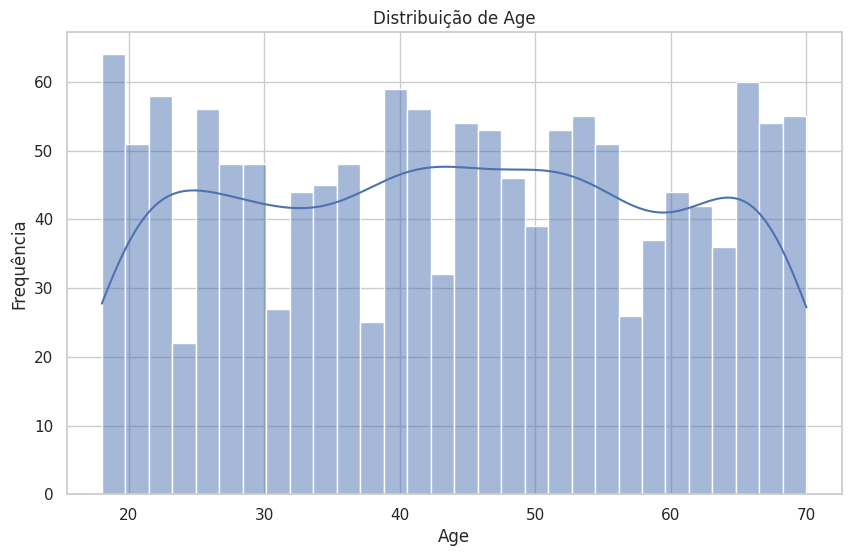

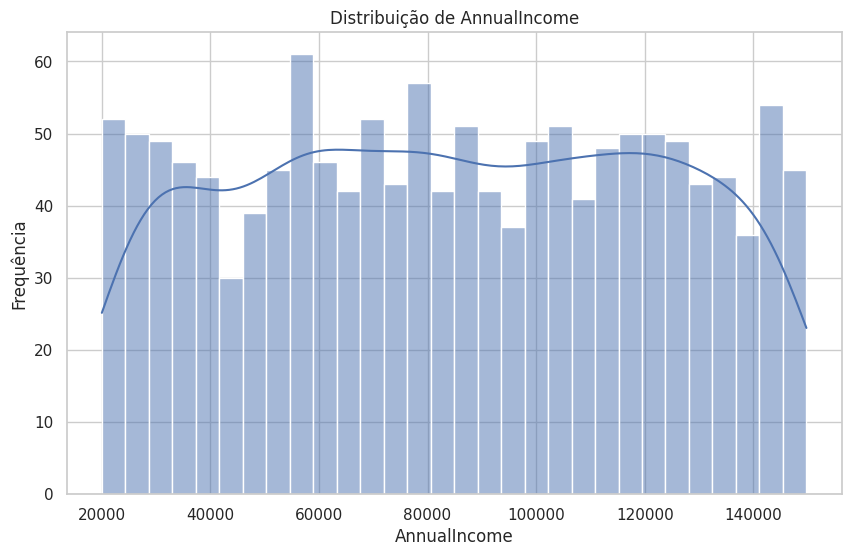

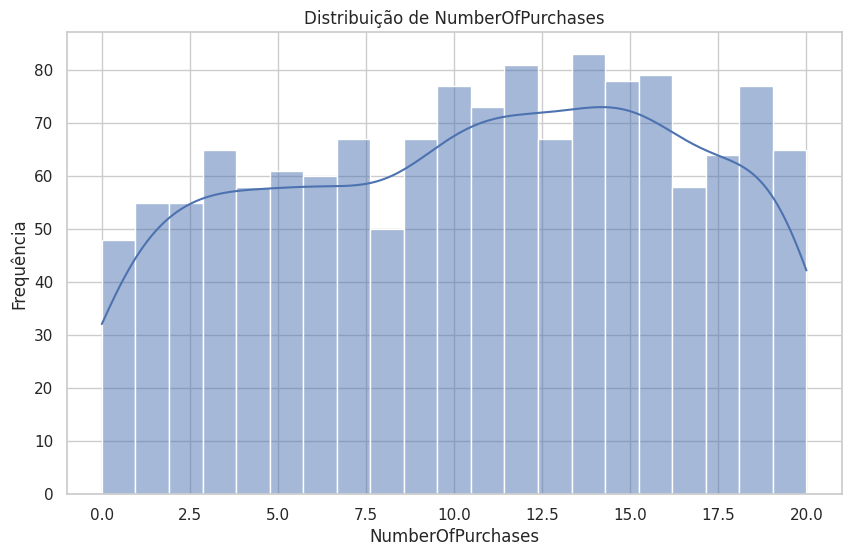

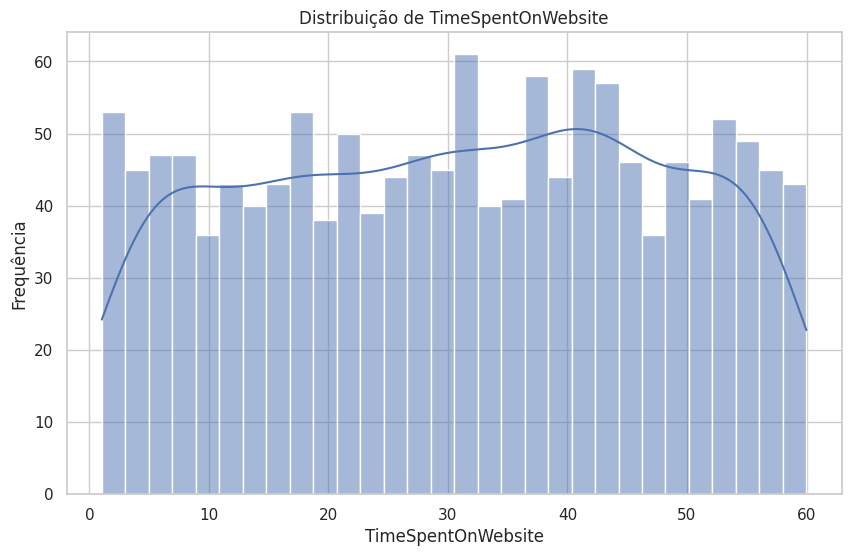

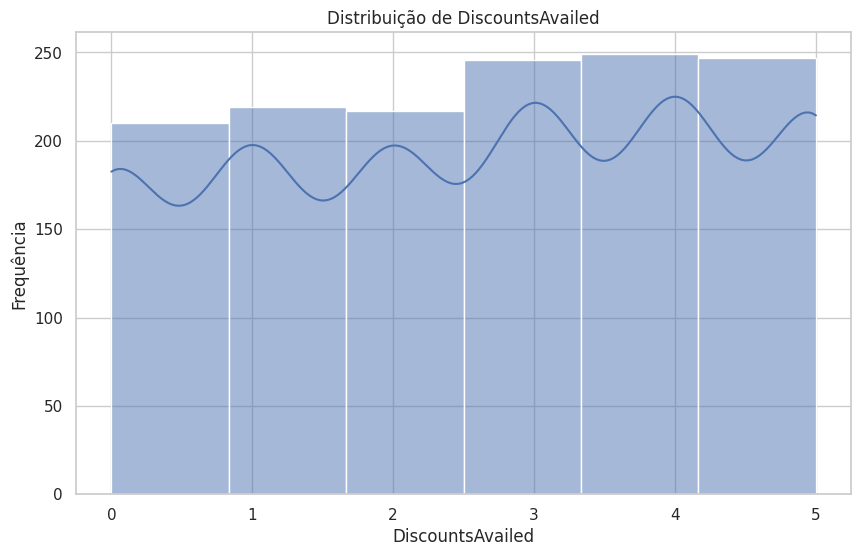

In [25]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Distribuição das variáveis contínuas
numeric_cols = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']

for col in numeric_cols:
    plt.figure()
    unique_vals = df[col].nunique()
    bins = unique_vals if unique_vals < 30 else 30
    sns.histplot(df[col], kde=True, bins=bins)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

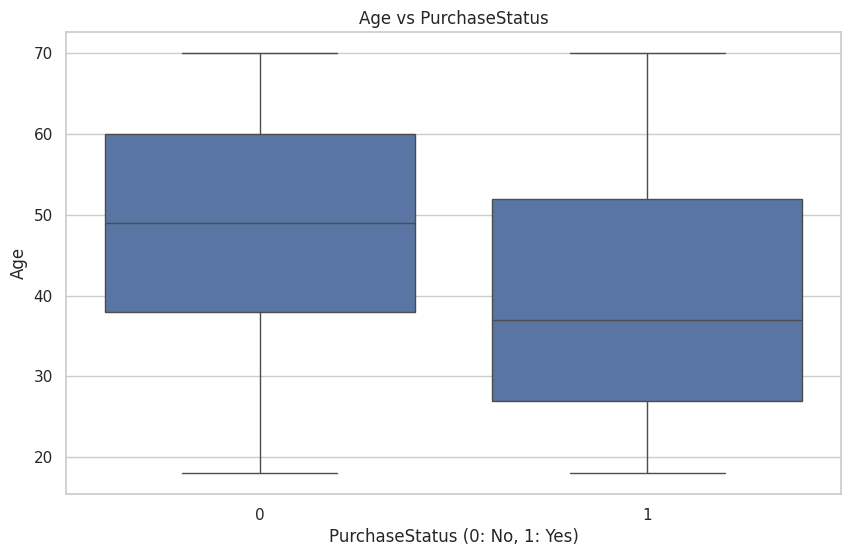

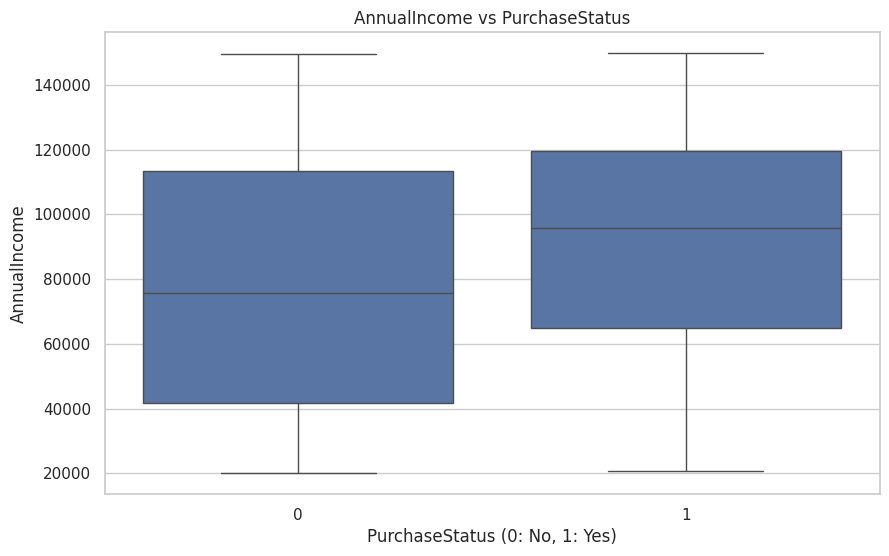

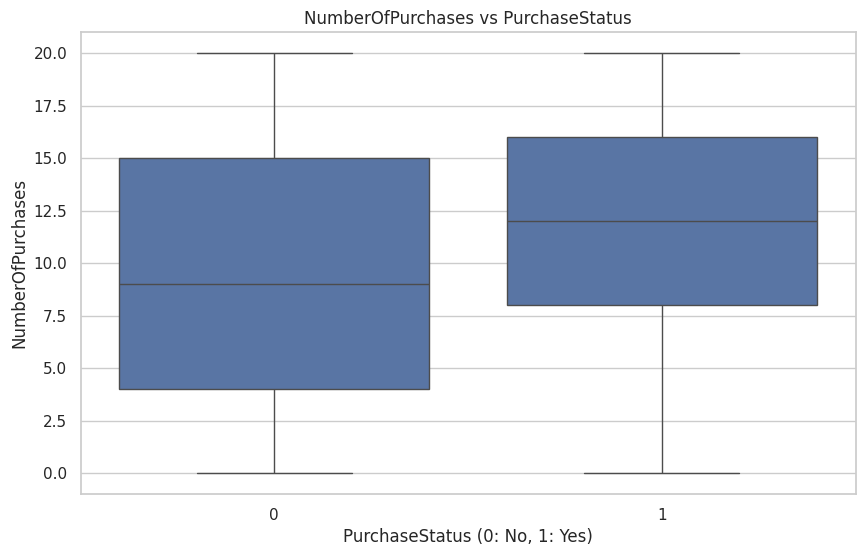

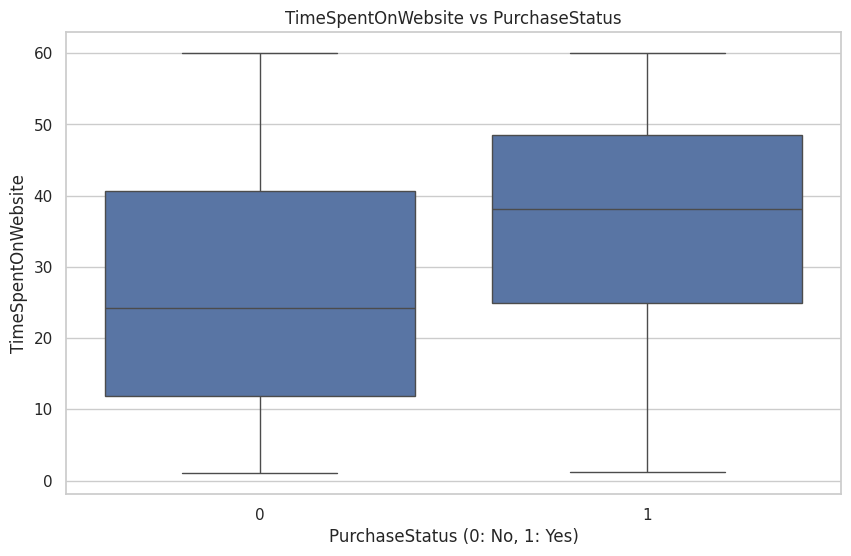

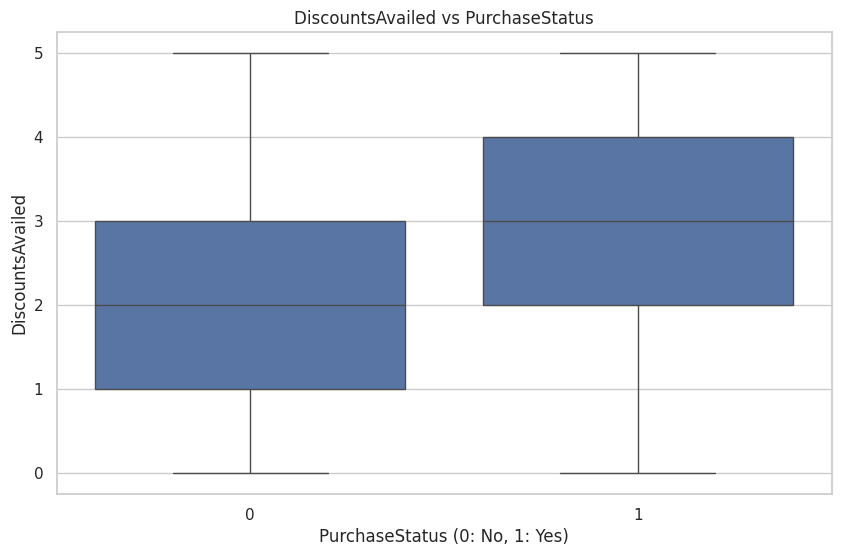

In [26]:
# 2. Boxplots por status de compra
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x='PurchaseStatus', y=col, data=df)
    plt.title(f'{col} vs PurchaseStatus')
    plt.xlabel('PurchaseStatus (0: No, 1: Yes)')
    plt.ylabel(col)
    plt.show()

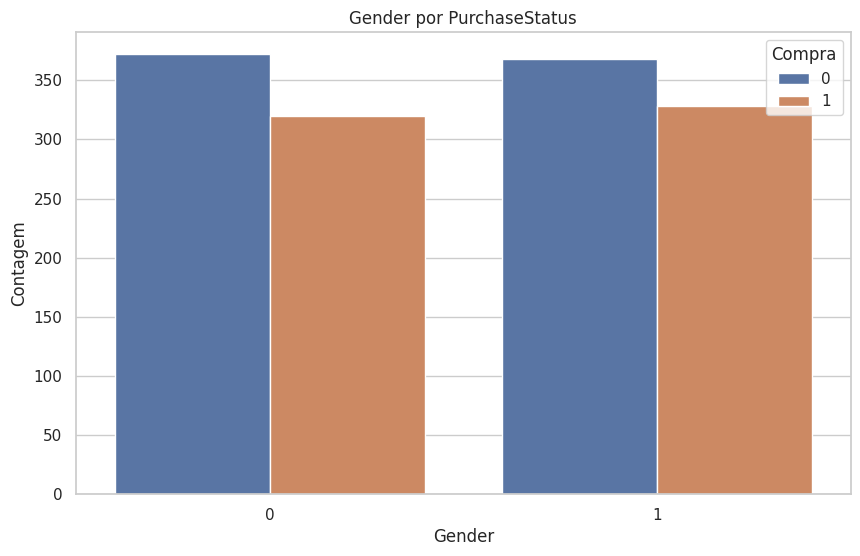

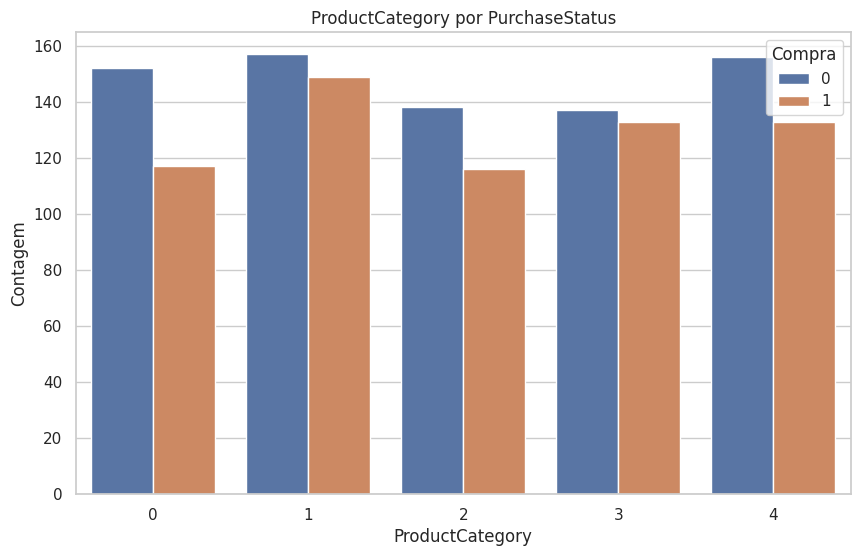

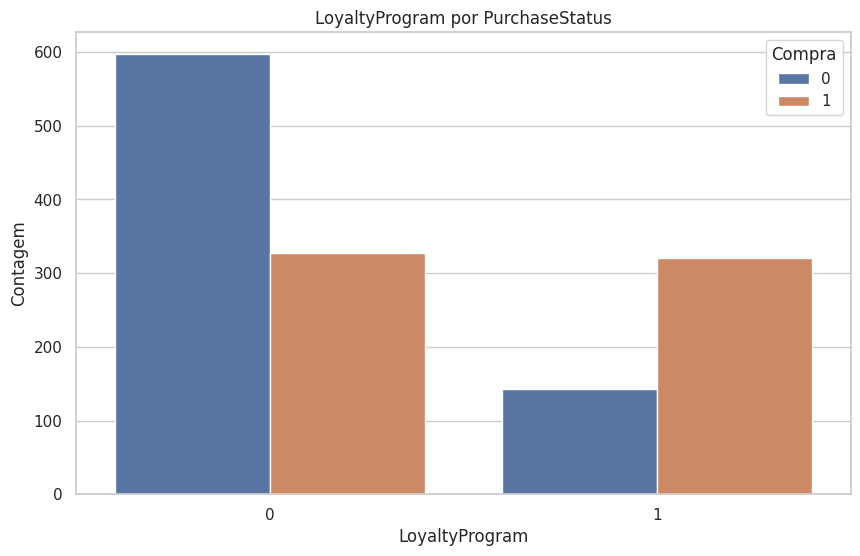

In [27]:
# 3. Contagens de variáveis categóricas
categorical_cols = ['Gender', 'ProductCategory', 'LoyaltyProgram']
for col in categorical_cols:
    plt.figure()
    sns.countplot(x=col, hue='PurchaseStatus', data=df)
    plt.title(f'{col} por PurchaseStatus')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.legend(title='Compra')
    plt.show()


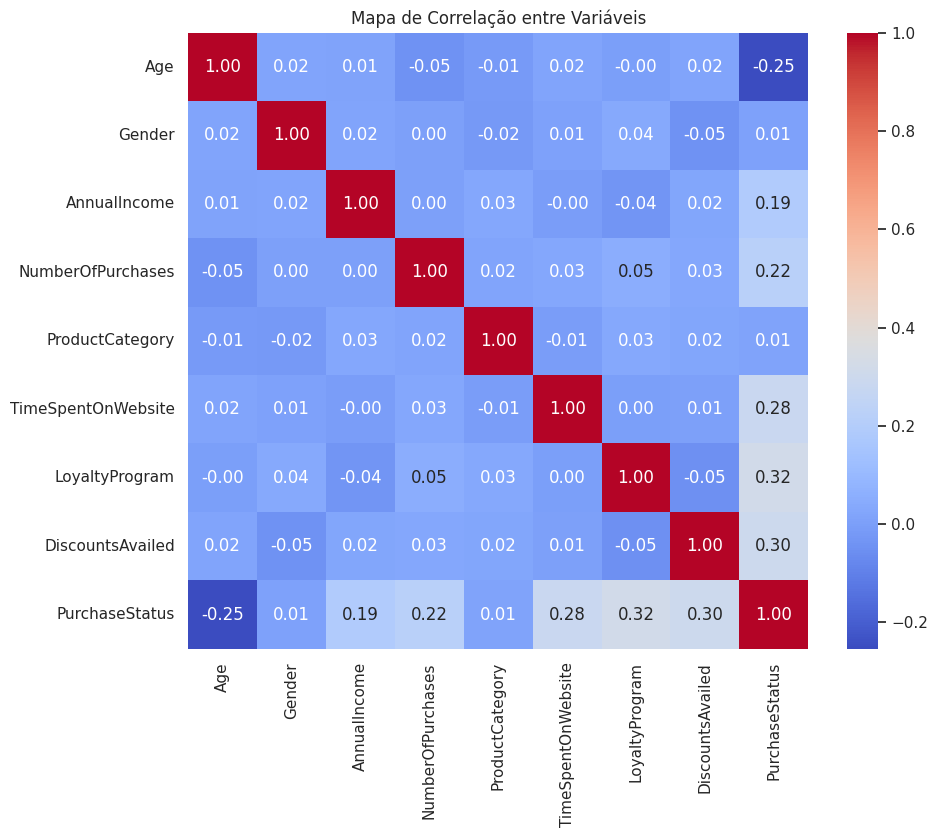

In [28]:
# 4. Mapa de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação entre Variáveis')
plt.show()

In [29]:
# Aplica o estilo whitegrid aos gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

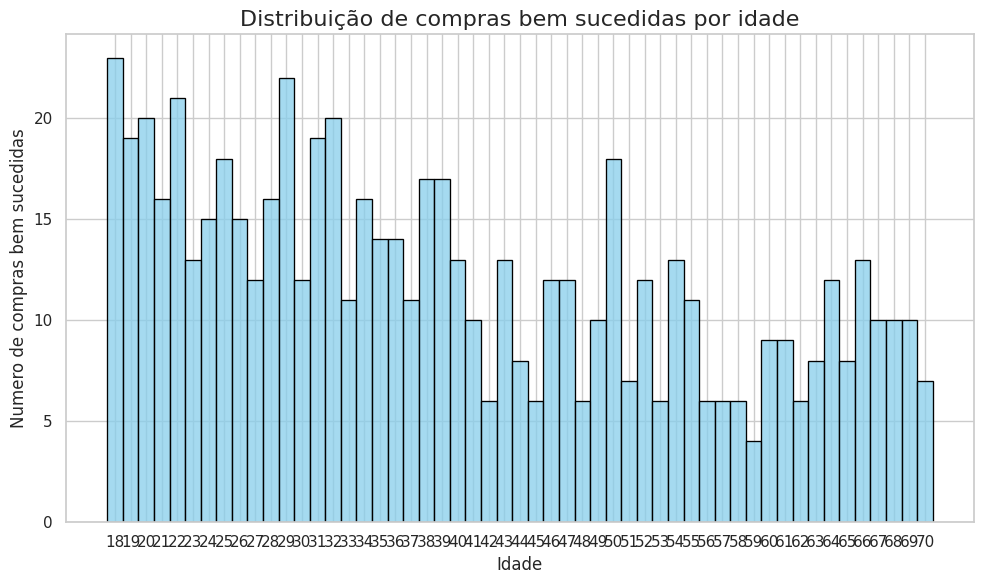

In [30]:
# Filtra apenas os registros onde PurchaseStatus == 1
df_purchase_true = df[df['PurchaseStatus'] == 1]

# Define o intervalo de bins para cobrir todas as idades distintas
min_age = df_purchase_true["Age"].min()
max_age = df_purchase_true["Age"].max()
bins = range(min_age, max_age + 2)  # +2 para incluir o último valor como limite do último bin

# Criação do histograma com uma barra por valor de idade
sns.histplot(data=df_purchase_true, x="Age", bins=bins, discrete=True, color="skyblue", edgecolor="black")

# Títulos e rótulos
plt.title("Distribuição de compras bem sucedidas por idade", fontsize=16)
plt.xlabel("Idade", fontsize=12)
plt.ylabel("Numero de compras bem sucedidas", fontsize=12)
plt.xticks(range(min_age, max_age + 1))  # Garante que cada idade apareça no eixo X
plt.tight_layout()
plt.show()

Levando em consideração que a distruição de idade das pessoas que compram vai de 18 a 70, sendo 44 a média das idades, olhando apenas essa _feature_, a tendência é que pessoas com idade abaixo da média façam compras bem sucedidas.

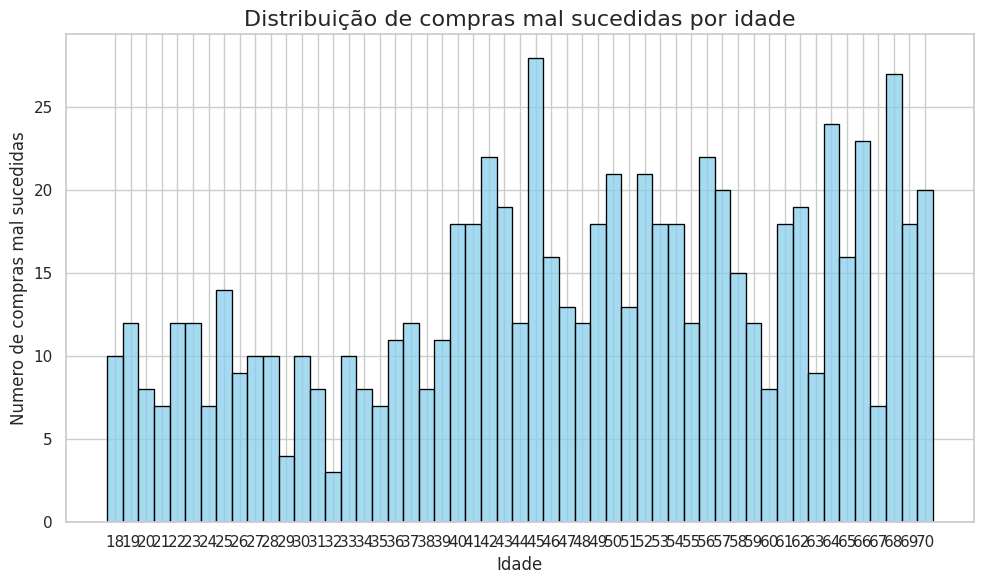

In [32]:
# Filtra apenas os registros onde PurchaseStatus == 1
df_purchase_false = df[df['PurchaseStatus'] == 0]

# Define o intervalo de bins para cobrir todas as idades distintas
min_age = df_purchase_false["Age"].min()
max_age = df_purchase_false["Age"].max()
bins = range(min_age, max_age + 2)  # +2 para incluir o último valor como limite do último bin

# Criação do histograma com uma barra por valor de idade
sns.histplot(data=df_purchase_false, x="Age", bins=bins, discrete=True, color="skyblue", edgecolor="black")

# Títulos e rótulos
plt.title("Distribuição de compras mal sucedidas por idade", fontsize=16)
plt.xlabel("Idade", fontsize=12)
plt.ylabel("Numero de compras mal sucedidas", fontsize=12)
plt.xticks(range(min_age, max_age + 1))  # Garante que cada idade apareça no eixo X
plt.tight_layout()
plt.show()

Tem-se o entendimento contrário ao que foi visto anteriormente, com pessoas de mais idade realizando menos compras bem sucedidas.